<a href="https://colab.research.google.com/github/Ohellay/arbitrary/blob/main/Binary_classification_of_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Supervised learning is a type of machine learning where the algorithm learns from labeled training data, i.e., data that includes both input features and the corresponding correct output. The goal is for the model to learn a mapping from inputs to outputs so that it can make accurate predictions on new, unseen data. In classification problems, the output is a categorical label rather than a continuous value.

[Problem 1] Select features and categories for practice

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
data = pd.DataFrame(data= np.c_[iris["data"]], columns=iris["feature_names"])
print(data)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [ ]:
target = pd.DataFrame(data=np.c_[iris["target"]], columns = ['Species'])

target.head()

,Species
0,0
1,0
2,0
3,0
4,0


In [ ]:
df = pd.concat([data, target], axis =1)
df = df.loc[df["Species"].isin([1,2])]
df = df.reset_index(drop=True)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,7.0,3.2,4.7,1.4,1
1,6.4,3.2,4.5,1.5,1
2,6.9,3.1,4.9,1.5,1
3,5.5,2.3,4.0,1.3,1
4,6.5,2.8,4.6,1.5,1


In [ ]:
df1 = df.loc[:, ["sepal length (cm)", "petal length (cm)", "Species"]]
df1.head()

,sepal length (cm),petal length (cm),Species
0,7.0,4.7,1
1,6.4,4.5,1
2,6.9,4.9,1
3,5.5,4.0,1
4,6.5,4.6,1


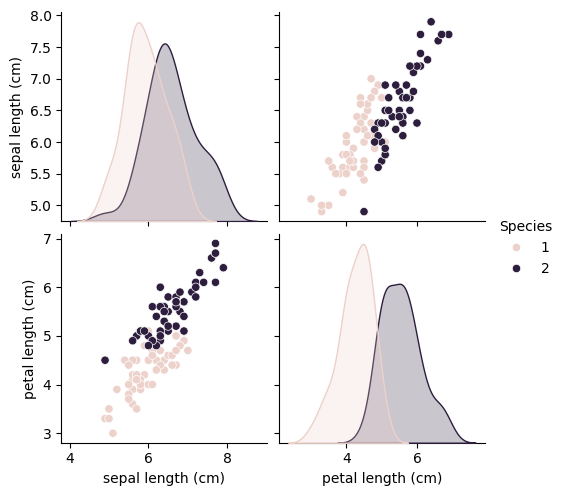

In [ ]:
sns.pairplot(df1, hue="Species")

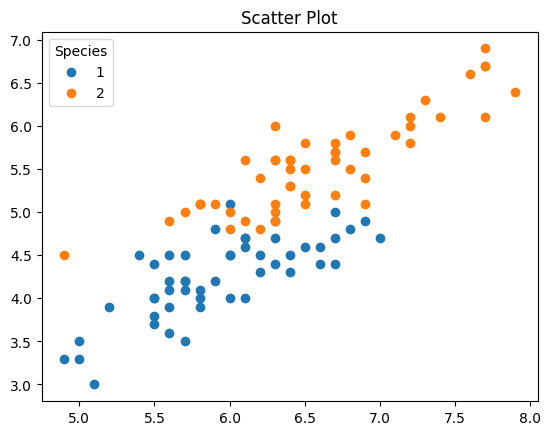

In [ ]:
# Create a scatter plot
for species in df1["Species"].unique():
    df_species = df1[df1["Species"] == species]
    plt.scatter(df_species["sepal length (cm)"], df_species["petal length (cm)"], label=species)

# Add title and legend
plt.title("Scatter Plot")
plt.legend(title="Species")

# Show the plot
plt.show()

[Problem 2] Data analysis [BOX PLOT] & [VIOLIN PLOT]

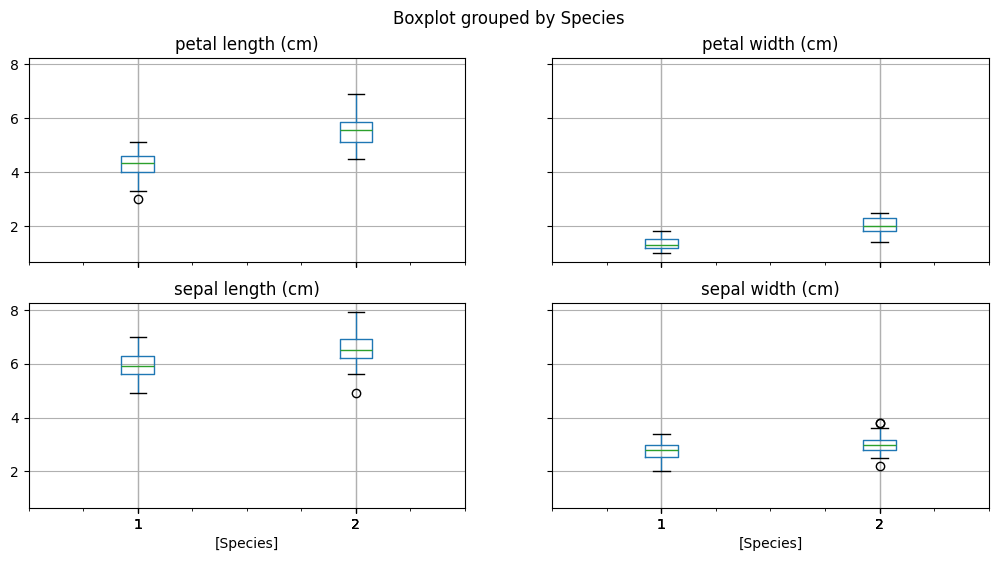

In [ ]:
df.boxplot(by="Species",figsize=(12,6))
plt.show()

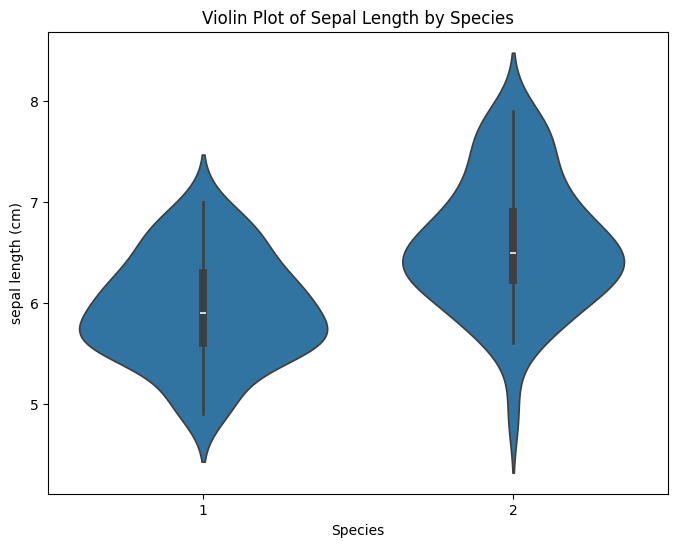

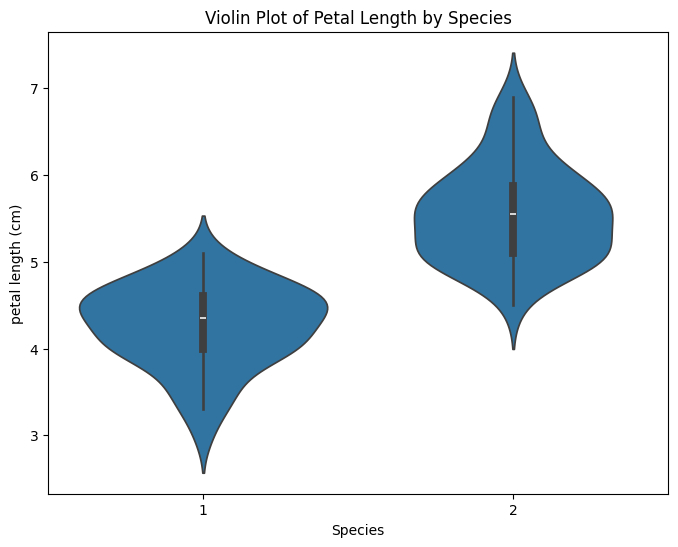

In [ ]:
# Create a violin plot for sepal length
plt.figure(figsize=(8, 6))
sns.violinplot(x="Species", y="sepal length (cm)", data=df1)
plt.title("Violin Plot of Sepal Length by Species")
plt.show()

# Create a violin plot for petal length
plt.figure(figsize=(8, 6))
sns.violinplot(x="Species", y="petal length (cm)", data=df1)
plt.title("Violin Plot of Petal Length by Species")
plt.show()

[Problem 3] Division of preprocessing/training data and verification data

In [ ]:
y = np.array(df1.loc[:,'Species']).ravel()
y.ndim

1

In [ ]:
X = np.array(df.loc[:, ["sepal length (cm)", "petal length (cm)"]])
X.shape

(100, 2)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
X_train, X_test, y_train, y_test  = train_test_split(X,y, test_size=0.25, random_state =42)

In [ ]:
X_train.shape

(75, 2)

In [ ]:
X_test.shape

(25, 2)

In [ ]:
y_train.ndim

1

In [ ]:
y_test.ndim

1

[Problem 4] Pretreatment/Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_trainTransform = scaler.transform(X_train)
X_testTransform = scaler.transform(X_test)

[Problem 5] Learning and estimation

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


# Initialize the k-NN classifier with k=5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Train the k-NN classifier on the training data
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
_5nnclassifier =  KNeighborsClassifier(n_neighbors=5)
_5nnclassifier.fit(X_trainTransform, y_train)
y_pred_5nn =_5nnclassifier.predict(X_testTransform)
print(y_pred_5nn )

_3nnclassifier =  KNeighborsClassifier(n_neighbors=3)
_3nnclassifier.fit(X_trainTransform, y_train)
y_pred_3nn =_3nnclassifier.predict(X_testTransform)
print(y_pred_3nn )

_1nnclassifier =  KNeighborsClassifier(n_neighbors=1)
_1nnclassifier.fit(X_trainTransform, y_train)
y_pred_1nn =_1nnclassifier.predict(X_testTransform)
print(y_pred_1nn )


[2 2 2 1 1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 1 2 1 1 1 2]
[2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 1 1 1 2 1 1 1 2]
[2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 1 1 1 2 1 1 1 2]


[Problem 6] Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate indicators for pred_5nn
accuracy = accuracy_score(y_test, y_pred_5nn)
precision = precision_score(y_test, y_pred_5nn)
recall = recall_score(y_test, y_pred_5nn)
f1 = f1_score(y_test, y_pred_5nn)

# Display confusion matrix for pred_5nn
conf_mat = confusion_matrix(y_test, y_pred_5nn)
print(conf_mat)

# Calculate indicators for pred_3nn
accuracy_2 = accuracy_score(y_test, y_pred_3nn)
precision_2 = precision_score(y_test, y_pred_3nn)
recall_2 = recall_score(y_test, y_pred_3nn)
f1_2 = f1_score(y_test, y_pred_3nn)

# Display confusion matrix for pred_3nn
conf_mat_2 = confusion_matrix(y_test, y_pred_3nn)
print(conf_mat_2)

# Calculate indicators for pred_1nn
accuracy_3 = accuracy_score(y_test, y_pred_1nn)
precision_3 = precision_score(y_test, y_pred_1nn)
recall_3 = recall_score(y_test, y_pred_1nn)
f1_3 = f1_score(y_test, y_pred_1nn)

# Display confusion matrix for pred_1nn
conf_mat_3 = confusion_matrix(y_test, y_pred_1nn)
print(conf_mat_3)

print("indicators for pred_5nn")
# Print indicators for pred_5nn
print("Accuracy:", accuracy)
print(f"Accuracy in percentage: , {accuracy *100}")
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("")
# Print indicators for pred_3nn

print("indicators for pred_3nn")
print("")
print("Accuracy:", accuracy_2)
print(f"Accuracy in percentage: , {accuracy_2 *100}")
print("Precision:", precision_2)
print("Recall:", recall_2)
print("F1-score:", f1_2)

# Print indicators for pred_1nn
print("")
print("indicators for pred_1nn")
print("Accuracy:", accuracy_3)
print(f"Accuracy in percentage: , {accuracy_3 *100}")
print("Precision:", precision_3)
print("Recall:", recall_3)
print("F1-score:", f1_3)

[[13  1]
 [ 4  7]]
[[12  2]
 [ 3  8]]
[[12  2]
 [ 3  8]]
indicators for pred_5nn
Accuracy: 0.8
Accuracy in percentage: , 80.0
Precision: 0.7647058823529411
Recall: 0.9285714285714286
F1-score: 0.8387096774193549

indicators for pred_3nn

Accuracy: 0.8
Accuracy in percentage: , 80.0
Precision: 0.8
Recall: 0.8571428571428571
F1-score: 0.8275862068965517

indicators for pred_1nn
Accuracy: 0.8
Accuracy in percentage: , 80.0
Precision: 0.8
Recall: 0.8571428571428571
F1-score: 0.8275862068965517


[Problem 7] Visualization

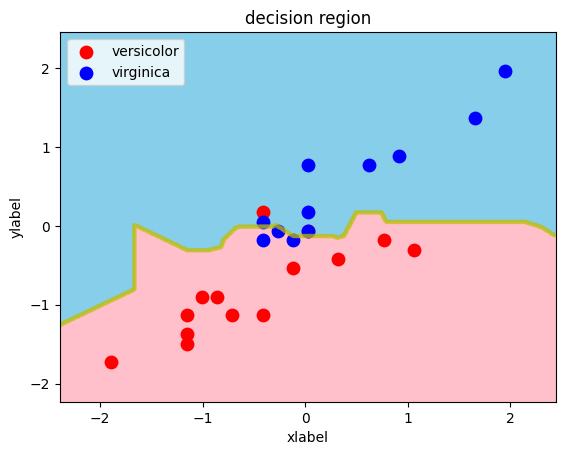

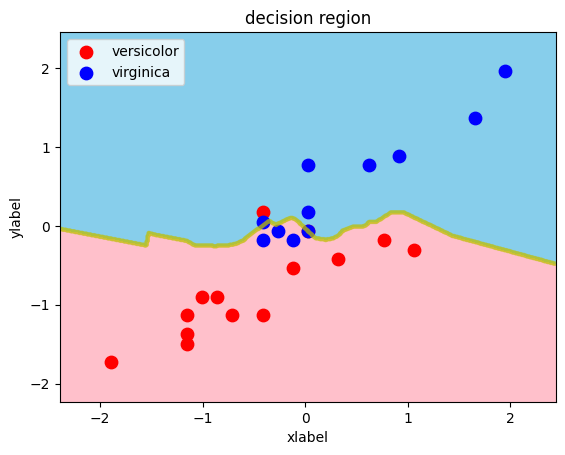

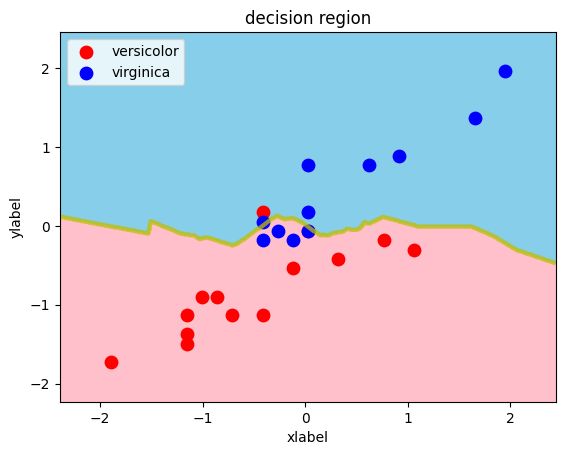

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    Draw the determination area of the model that learned binary classification with two-dimensional features.
    The background color is drawn from the estimated values of the trained model.
    The points on the scatter plot are training or validation data.

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        Feature value
    y : ndarray, shape(n_samples,)
        label
    model : object
        Insert the installed model of the learned model
    step : float, (default : 0.1)
        Set the interval to calculate the estimate
    title : str
        Give the text of the graph Title
    xlabel, ylabel : str
        Give the text of the axis label
    target_names= : list of str
        Give a list of legends
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()



models = [_1nnclassifier, _3nnclassifier, _5nnclassifier]
for a, model in enumerate(models,1):
    decision_region(X_testTransform, y_test, model)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_trainTransform, y_train)
y_pred_knn = knn.predict(X_testTransform)

In [ ]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(X_trainTransform, y_train)
y_pred_logit = logit.predict(X_testTransform)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier(criterion= 'entropy', random_state = 0)
dc.fit(X_trainTransform, y_train)
y_pred_dc = dc.predict(X_testTransform)

In [ ]:
from sklearn import svm
svm = svm.SVC()
svm.fit(X_trainTransform, y_train)
y_pred_svm = svm.predict(X_testTransform)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rc = RandomForestClassifier(random_state = 0)
rc.fit(X_trainTransform, y_train)
y_pred_rc = rc.predict(X_testTransform)

KNN  Confusion Matrix : [[13  1]
 [ 4  7]]

indicators for pred_Knn
Accuracy: 0.8
Accuracy in percentage: , 80.0
Precision: 0.7647058823529411
Recall: 0.9285714285714286
F1-score: 0.8387096774193549


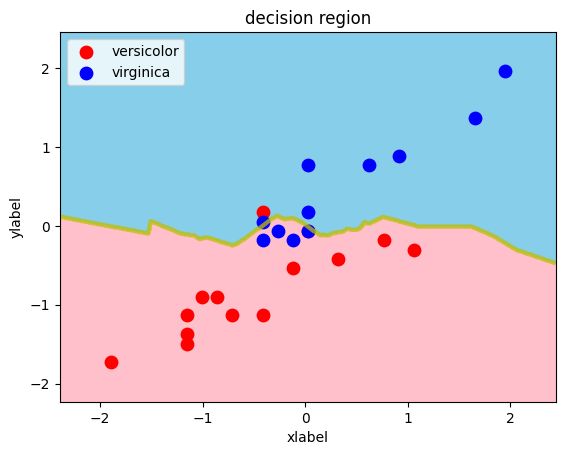

In [ ]:
#KNN
conf_mat_knn = confusion_matrix(y_test, y_pred_knn)
accuracy_knn = accuracy_score(y_test,y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test,  y_pred_knn)
f1_knn = f1_score(y_test,  y_pred_knn)
print(f'KNN Confusion Matrix : {conf_mat_knn }')
print("")
print("indicators for pred_Knn")
print("Accuracy:", accuracy_knn)
print(f"Accuracy in percentage: , {accuracy_knn *100}")
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1-score:", f1_knn)
decision_region(X_testTransform,y_test, knn)
print("\n")

Logistic Confusion Matrix : [[12  2]
 [ 2  9]]

indicators for pred_Logit
Accuracy: 0.84
Accuracy in percentage: , 84.0
Precision: 0.8571428571428571
Recall: 0.8571428571428571
Recall: 0.8571428571428571
F1-score: 0.8571428571428571


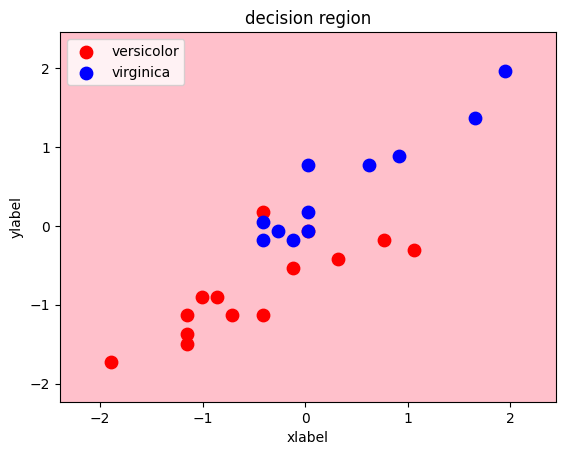

In [ ]:
#Logistic
conf_mat_logit = confusion_matrix(y_test, y_pred_logit)
accuracy_logit = accuracy_score(y_test,y_pred_logit)
precision_logit = precision_score(y_test, y_pred_logit)
recall_logit = recall_score(y_test,  y_pred_logit)
f1_logit = f1_score(y_test,  y_pred_logit)
print(f'Logistic Confusion Matrix : {conf_mat_logit }')
print("")
print("indicators for pred_Logit")
print("Accuracy:", accuracy_logit)
print(f"Accuracy in percentage: , {accuracy_logit *100}")
print("Precision:", precision_logit)
print("Recall:", recall_logit)
print("Recall:", recall_logit)
print("F1-score:", f1_logit)
decision_region(X_testTransform, y_test, logit)
print("\n")

SVM Confusion Matrix : [[12  2]
 [ 2  9]]

indicators for pred_SVM
Accuracy: 0.84
Accuracy in percentage: , 84.0
Precision: 0.8571428571428571
Recall: 0.8571428571428571
F1-score: 0.8571428571428571


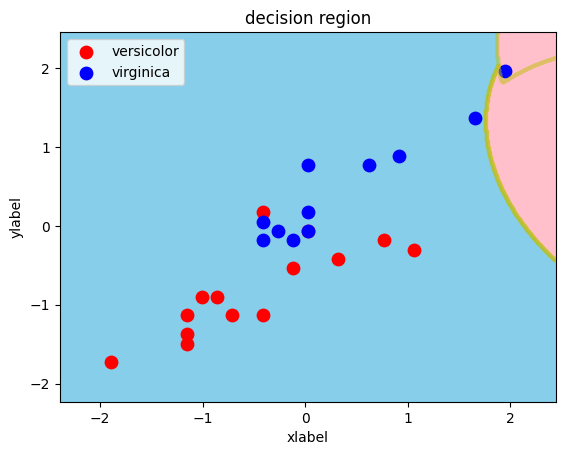

In [ ]:
#SVM
conf_mat_svm = confusion_matrix(y_test, y_pred_svm)
accuracy_svm = accuracy_score(y_test,y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test,  y_pred_svm)
f1_svm = f1_score(y_test,  y_pred_svm)
print(f'SVM Confusion Matrix : {conf_mat_svm }')
print("")
print("indicators for pred_SVM")
print("Accuracy:", accuracy_svm)
print(f"Accuracy in percentage: , {accuracy_svm *100}")
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1-score:", f1_svm)
decision_region(X_testTransform, y_test, svm)
print("\n")

KNN  Confusion Matrix : [[13  1]
 [ 4  7]]

indicators for pred_Rc
Accuracy: 0.84
Accuracy in percentage: , 84.0
Precision: 0.8125
Recall: 0.9285714285714286
F1-score: 0.8666666666666667


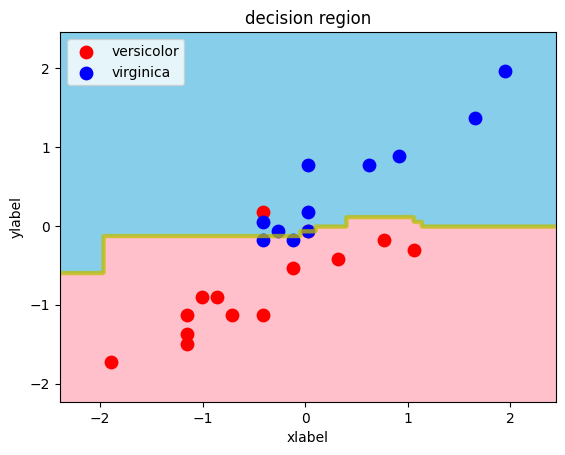

In [ ]:
#RandomForestClassifier
conf_mat_rc = confusion_matrix(y_test, y_pred_rc)
accuracy_rc = accuracy_score(y_test,y_pred_rc)
precision_rc = precision_score(y_test, y_pred_rc)
recall_rc = recall_score(y_test,  y_pred_rc)
f1_rc = f1_score(y_test,  y_pred_rc)
print(f'KNN  Confusion Matrix : {conf_mat_knn }')
print("")
print("indicators for pred_Rc")
print("Accuracy:", accuracy_rc)
print(f"Accuracy in percentage: , {accuracy_rc *100}")
print("Precision:", precision_rc)
print("Recall:", recall_rc)
print("F1-score:", f1_rc)
decision_region(X_testTransform,y_test, rc)
print("\n")

KNN  Confusion Matrix : [[13  1]
 [ 4  7]]

indicators for pred_Knn
Accuracy: 0.8
Accuracy in percentage: , 80.0
Precision: 0.7647058823529411
Recall: 0.9285714285714286
F1-score: 0.8387096774193549


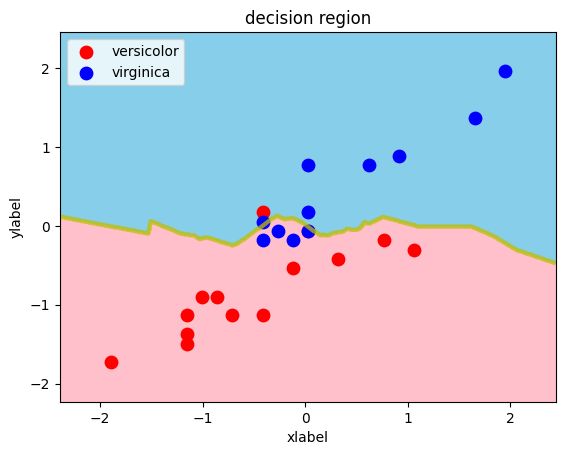

In [ ]:
#KNN
conf_mat_dc = confusion_matrix(y_test, y_pred_dc)
accuracy_dc = accuracy_score(y_test,y_pred_dc)
precision_dc = precision_score(y_test, y_pred_dc)
recall_dc = recall_score(y_test,  y_pred_dc)
f1_dc = f1_score(y_test,  y_pred_dc)
print(f'KNN  Confusion Matrix : {conf_mat_dc }')
print("")
print("indicators for pred_Knn")
print("Accuracy:", accuracy_dc)
print(f"Accuracy in percentage: , {accuracy_dc *100}")
print("Precision:", precision_dc)
print("Recall:", recall_dc)
print("F1-score:", f1_dc)
decision_region(X_testTransform,y_test, knn)
print("\n")

[Problem 9] (Advanced task) Comparison with and without standardization

In [ ]:
def standard(title, prediction,model, std):
    print(title)
    print("Confusion Matrix:", confusion_matrix(y_true=y_test, y_pred = prediction))
    print("Accuracy_Score:", accuracy_score(y_true=y_test, y_pred = prediction)*100)
    print("Precision:", precision_score(y_true=y_test, y_pred = prediction, average=None))
    print("Recall:", recall_score(y_true=y_test, y_pred = prediction, average=None))
    print("F1-score:", f1_score(y_true=y_test, y_pred = prediction, average = None))
    decision_region(X_test,y_test, model)

    model =[knn, logit, svm, dc, rc,]

KNNClassifier
Confusion Matrix: [[13  1]
 [ 4  7]]
Accuracy_Score: 80.0
Precision: [0.76470588 0.875     ]
Recall: [0.92857143 0.63636364]
F1-score: [0.83870968 0.73684211]


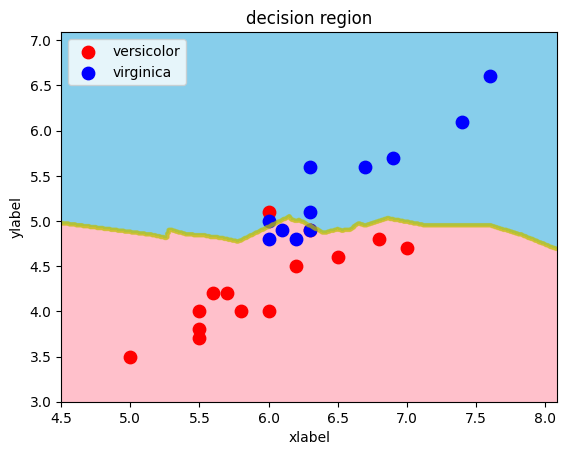

----------------------------------------------------------------------------------------------------------------------
LogisticRegression
Confusion Matrix: [[12  2]
 [ 2  9]]
Accuracy_Score: 84.0
Precision: [0.85714286 0.81818182]
Recall: [0.85714286 0.81818182]
F1-score: [0.85714286 0.81818182]


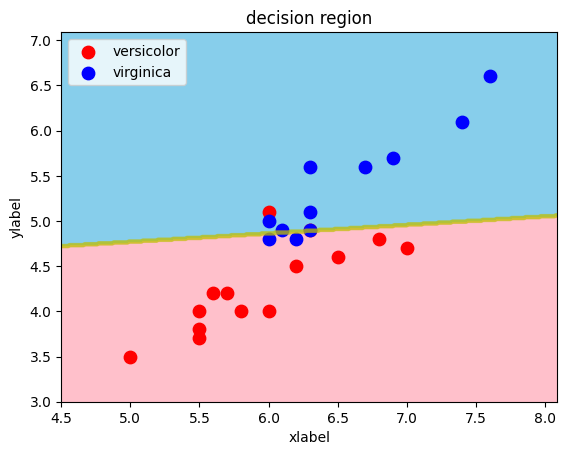

-------------------------------------------------------------------------------------------------------------------------
SVM
Confusion Matrix: [[12  2]
 [ 2  9]]
Accuracy_Score: 84.0
Precision: [0.85714286 0.81818182]
Recall: [0.85714286 0.81818182]
F1-score: [0.85714286 0.81818182]


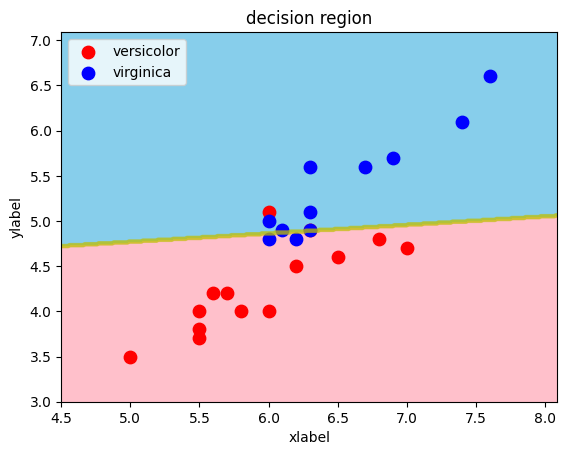

--------------------------------------------------------------------------------------------------------------------
DecisionTreeClassifier
Confusion Matrix: [[12  2]
 [ 2  9]]
Accuracy_Score: 84.0
Precision: [0.85714286 0.81818182]
Recall: [0.85714286 0.81818182]
F1-score: [0.85714286 0.81818182]


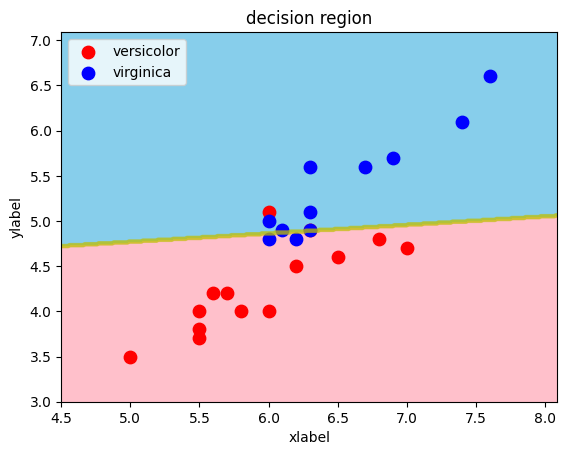

-------------------------------------------------------------------------------------------------------------------------
RandomForestClassifier
Confusion Matrix: [[12  2]
 [ 2  9]]
Accuracy_Score: 84.0
Precision: [0.85714286 0.81818182]
Recall: [0.85714286 0.81818182]
F1-score: [0.85714286 0.81818182]


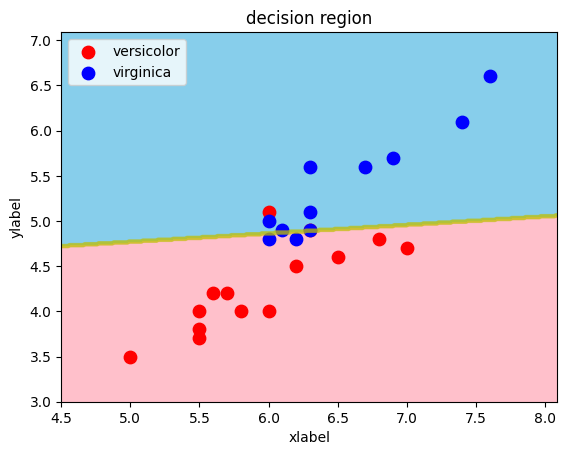

-----------------------------------------------------------------------------------------------------------------


In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_predn = knn.predict(X_test)
standard('KNNClassifier', y_predn, knn, std=False)
print("----------------------------------------------------------------------------------------------------------------------")
logit = LogisticRegression()
logit.fit(X_train, y_train)
y_predn_lr = logit.predict(X_test)
standard('LogisticRegression', y_predn_lr, logit, std=False)
print("-------------------------------------------------------------------------------------------------------------------------")
svm = LogisticRegression()
svm.fit(X_train, y_train)
y_predn_svm = svm.predict(X_test)
standard('SVM', y_predn_svm, svm, std=False)
print("--------------------------------------------------------------------------------------------------------------------")
dc = LogisticRegression()
dc.fit(X_train, y_train)
y_predn_dc = logit.predict(X_test)
standard('DecisionTreeClassifier', y_predn_dc, dc, std=False)
print("-------------------------------------------------------------------------------------------------------------------------")
rc = LogisticRegression()
rc.fit(X_train, y_train)
y_predn_rc = logit.predict(X_test)
standard('RandomForestClassifier', y_predn_rc, rc, std=False)
print("-----------------------------------------------------------------------------------------------------------------")


If standardization is not used as a preprocessing step, the results may vary significantly.


**KNN Classifier
- High accuracy (80%) indicates good overall performance.
- Precision and recall values indicate that the classifier is slightly better at predicting the positive class than the negative class.
- F1-scores provide a balanced measure of precision and recall, indicating that the classifier is reasonably good at both.

**LogisiticClassifier
- High accuracy (84%)
- Good precision and recall for both classes (around 85% and 82%)
- F1-scores indicate a good balance between precision and recall

the model is performing well, with a slight bias towards the positive class. However, the results are promising, and the model can be considered for further evaluation and potential deployment.


**SVM Classifier
The SVM model has:

- High accuracy (84%)
- Good precision and recall for both classes (around 85% and 82%)
- F1-scores indicate a good balance between precision and recall

the model is performing well, with a slight bias towards the positive class. The results are similar to the Logistic Regression model, indicating that both models are performing similarly well. However, the choice of model may depend on other factors such as interpretability, computational resources, and specific requirements of the problem.

The DecisionTreeClassifier model has achieved:

- High accuracy of 84%
- Good precision and recall for both classes (around 85% and 82%)
- F1-scores indicate a good balance between precision and recall

This suggests that the model is performing well, with a slight bias towards the positive class. The results are similar to the Logistic Regression and SVM models, indicating that all three models are performing similarly well.

The RandomForestClassifier model has achieved:

- High accuracy of 84%, indicating that the model is correctly predicting 84% of the instances.
- Good precision and recall for both classes:
    - Precision: 85.7% for the positive class and 81.8% for the negative class.
    - Recall: 85.7% for the positive class and 81.8% for the negative class.
- F1-scores indicate a good balance between precision and recall:
    - F1-score: 85.7% for the positive class and 81.8% for the negative class.

This suggests that the model is performing well, with a slight bias towards the positive class. The results are consistent with the other models (Logistic Regression, SVM, and DecisionTreeClassifier), indicating that all four models are performing similarly well.

[Problem 10](Advanced task)Method with high accuracy using all Objective variables

In [ ]:
x1 = np.array(data.loc[:, ['sepal length (cm)', 'petal length (cm)']])
x1.shape

(150, 2)

In [ ]:
y1 = np.array(target).ravel()
y1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
x1_train, x1_test, y1_train, y1_test  = train_test_split(x1,y1, test_size=0.25, random_state =42)
x1_train.shape, x1_test.shape,y1_train.shape, y1_test.shape

((112, 2), (38, 2), (112,), (38,))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knneigh = KNeighborsClassifier()
knneigh.fit(x1_train, y1_train)
y_predn_knn = knneigh.predict(x1_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
logitR = LogisticRegression()
logitR.fit(x1_train, y1_train)
y_predn_logit = logitR.predict(x1_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion= 'entropy', random_state = 0)
dtc.fit(x1_train, y1_train)
y_predn_dtc = dtc.predict(x1_test)

In [ ]:
from sklearn import svm
svmr = svm.SVC()
svmr.fit(x1_train, y1_train)
y_predn_svmr = svmr.predict(x1_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 0)
rfc.fit(x1_train, y1_train)
y_predn_rfc = rfc.predict(x1_test)

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region1(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['setosa', 'versicolor', 'virginica']):
    """
    Draw the determination area of the model that learned binary classification with two-dimensional features.
    The background color is drawn from the estimated values of the trained model.
    The points on the scatter plot are training or validation data.

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        Feature value
    y : ndarray, shape(n_samples,)
        label
    model : object
        Insert the installed model of the learned model
    step : float, (default : 0.1)
        Set the interval to calculate the estimate
    title : str
        Give the text of the graph Title
    xlabel, ylabel : str
        Give the text of the axis label
    target_names= : list of str
        Give a list of legends
    """
    # setting
    scatter_color = ['red', 'blue', "green"]
    contourf_color = ['pink', 'skyblue', "black"]
    n_class = 3

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()



models = [knneigh, logitR, svmr, dtc, rfc]


[1 0 2 1 1 0 1 1 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
KNN Confusion Matrix : [[15  0  0]
 [ 0 11  0]
 [ 0  1 11]]
indicators for predn_Knn
Accuracy: 0.9736842105263158
Accuracy in percentage: , 97.36842105263158
Precision: [1.         0.91666667 1.        ]
Recall: [1.         1.         0.91666667]
F1-score: [1.         0.95652174 0.95652174]


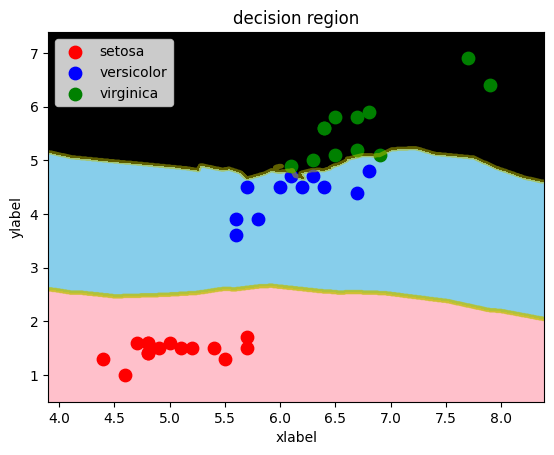



-------------------------------------------
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Logistic Confusion Matrix : [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]

indicators for pred_Knn
Accuracy: 1.0
Accuracy in percentage: , 100.0
Precision: [1. 1. 1.]
Recall: [1. 1. 1.]
F1-score: [1. 1. 1.]


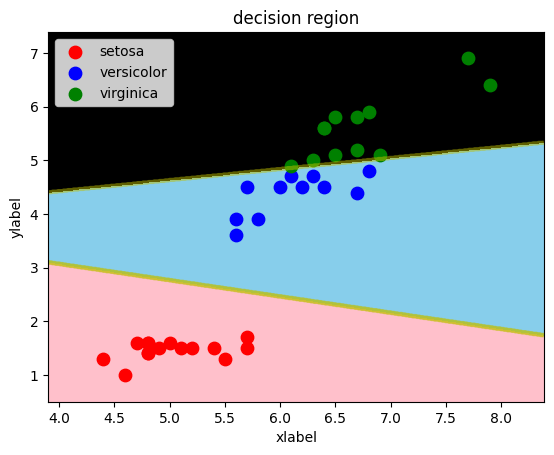

---------------------------------------------

SVM Confusion Matrix : [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]

indicators for pred_SVM
Accuracy: 1.0
Accuracy in percentage: , 100.0
Precision: [1. 1. 1.]
Recall: [1. 1. 1.]
F1-score: [1. 1. 1.]


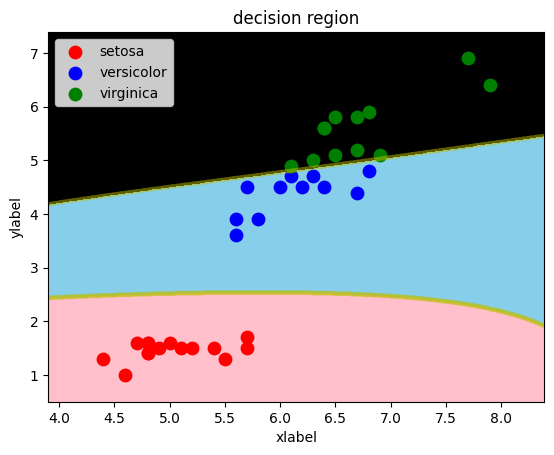



--------------------------------------------
y_predn_rfc 
RandomForest Confusion Matrix : [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]

indicators for pred_RC
Accuracy: 1.0
Accuracy in percentage: , 100.0
Precision: [1. 1. 1.]
Recall: [1. 1. 1.]
F1-score: [1. 1. 1.]


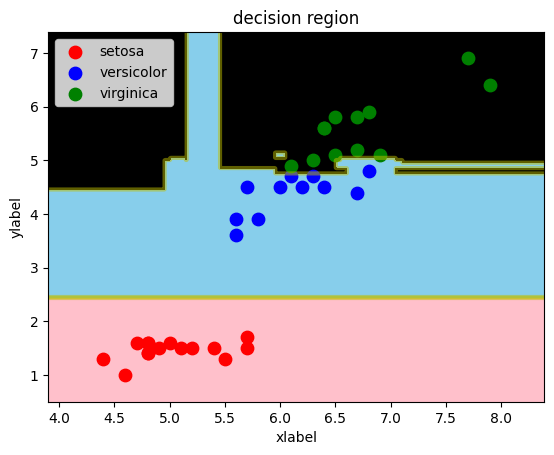



y_predn_dtc 
RandomForest Confusion Matrix : [[15  0  0]
 [ 0 11  0]
 [ 0  2 10]]

indicators for pred_RC
Accuracy: 0.9473684210526315
Accuracy in percentage: , 94.73684210526315
Precision: [1.         0.84615385 1.        ]
Recall: [1.         1.         0.83333333]
F1-score: [1.         0.91666667 0.90909091]


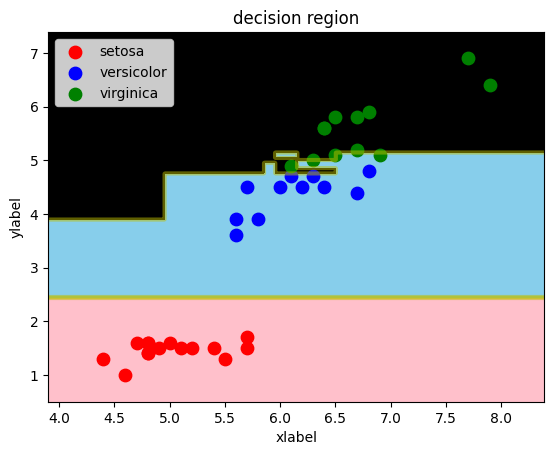

In [ ]:
#KNN
print(y_predn_knn)
conf_mat_knn = confusion_matrix(y1_test, y_predn_knn)
accuracy_knn = accuracy_score(y_true=y1_test,y_pred=y_predn_knn)
precision_knn = precision_score(y_true=y1_test,y_pred=y_predn_knn, average=None)
recall_knn = recall_score(y_true=y1_test,y_pred=y_predn_knn, average=None)
f1_knn = f1_score(y_true=y1_test,y_pred=y_predn_knn, average=None)
print(f'KNN Confusion Matrix : {conf_mat_knn }')
print("indicators for predn_Knn")
print("Accuracy:", accuracy_knn)
print(f"Accuracy in percentage: , {accuracy_knn *100}")
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1-score:", f1_knn)
decision_region1(x1_test,y1_test, knneigh)
print("\n")
print("-------------------------------------------")
#Logistic
print(y_predn_logit)
conf_mat_logit = confusion_matrix(y1_test, y_predn_logit)
accuracy_logit = accuracy_score(y1_test,y_predn_logit)
precision_logit = precision_score(y1_test, y_predn_logit, average=None)
recall_logit = recall_score(y1_test,  y_predn_logit, average=None)
f1_logit = f1_score(y1_test,  y_predn_logit, average=None)
print(f'Logistic Confusion Matrix : {conf_mat_logit }')
print("")
print("indicators for pred_Knn")
print("Accuracy:", accuracy_logit)
print(f"Accuracy in percentage: , {accuracy_logit *100}")
print("Precision:", precision_logit)
print("Recall:", recall_logit)
print("F1-score:", f1_logit)
decision_region1(x1_test,y1_test, logitR)
print("---------------------------------------------")
#SVM
print("")
conf_mat_svmr = confusion_matrix(y1_test, y_predn_svmr)
accuracy_svmr = accuracy_score(y1_test,y_predn_svmr)
precision_svmr = precision_score(y1_test, y_predn_svmr, average=None)
recall_svmr = recall_score(y1_test,  y_predn_svmr, average=None)
f1_svmr = f1_score(y1_test,  y_predn_svmr, average=None)
print(f'SVM Confusion Matrix : {conf_mat_svmr }')
print("")
print("indicators for pred_SVM")
print("Accuracy:", accuracy_svmr)
print(f"Accuracy in percentage: , {accuracy_svmr *100}")
print("Precision:", precision_svmr)
print("Recall:", recall_svmr)
print("F1-score:", f1_svmr)
decision_region1(x1_test,y1_test, svmr)
print("\n")
print("--------------------------------------------")
#rc
print("y_predn_rfc ")
conf_mat_rfc = confusion_matrix(y1_test, y_predn_rfc)
accuracy_rfc = accuracy_score(y1_test,y_predn_rfc)
precision_rfc = precision_score(y1_test, y_predn_rfc, average=None)
recall_rfc = recall_score(y1_test,  y_predn_rfc, average=None)
f1_rfc = f1_score(y1_test,  y_predn_rfc, average=None)
print(f'RandomForest Confusion Matrix : {conf_mat_rfc}')
print("")
print("indicators for pred_RC")
print("Accuracy:", accuracy_rfc)
print(f"Accuracy in percentage: , {accuracy_rfc *100}")
print("Precision:", precision_rfc)
print("Recall:", recall_rfc)
print("F1-score:", f1_rfc)
decision_region1(x1_test,y1_test, rfc)
print("\n")

#dtc
print("y_predn_dtc ")
conf_mat_dtc = confusion_matrix(y1_test, y_predn_dtc)
accuracy_dtc = accuracy_score(y1_test,y_predn_dtc)
precision_dtc = precision_score(y1_test, y_predn_dtc, average=None)
recall_dtc = recall_score(y1_test,  y_predn_dtc, average=None)
f1_dtc = f1_score(y1_test,  y_predn_dtc, average=None)
print(f'RandomForest Confusion Matrix : {conf_mat_dtc}')
print("")
print("indicators for pred_RC")
print("Accuracy:", accuracy_dtc)
print(f"Accuracy in percentage: , {accuracy_dtc *100}")
print("Precision:", precision_dtc)
print("Recall:", recall_dtc)
print("F1-score:", f1_dtc)
decision_region1(x1_test,y1_test, dtc)
print("\n")